In [2]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)
#función de salida Y(s) = H(s)X(s
Y = 1/(L*C*s**2 + R*C*s + 1) * X
Y

       X(s)       
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

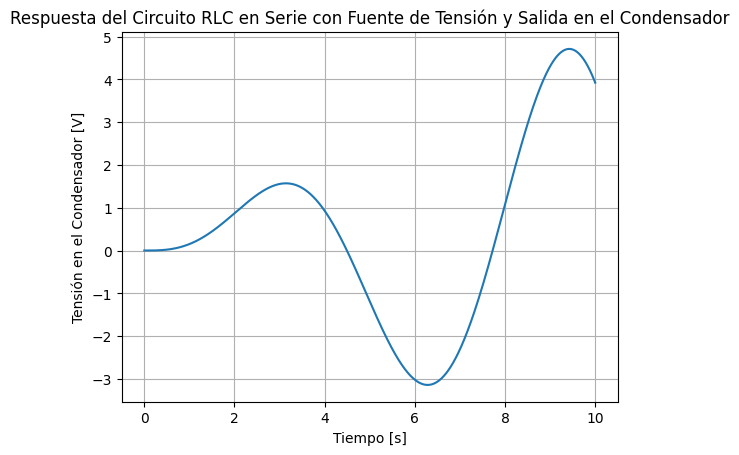

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la ecuación diferencial del circuito RLC en serie con fuente de tensión y salida en el condensador
def circuit_ode(V, t, R, L, C, V_in):
    dVdt = [
        V[1],  # dV/dt (tensión en el condensador)
        (1 / (L * C) - R / L) * V[1] - V[0] / (L * C) + V_in(t) / (L * C)  # d²V/dt² (corriente en el inductor)
    ]
    return dVdt

# Definir la fuente de tensión de entrada (puedes ajustarla según tus necesidades)
def input_voltage(t):
    return np.sin(t)

# Condiciones iniciales
V0 = [0.0, 0.0]

# Parámetros del circuito
R = 1.0
L = 1.0
C = 1.0

# Definir el tiempo de integración
t = np.linspace(0, 10, 1000)

# Resolver la ecuación diferencial numéricamente
solution = odeint(circuit_ode, V0, t, args=(R, L, C, input_voltage))

# Graficar la solución
plt.plot(t, solution[:, 0])
plt.title('Respuesta del Circuito RLC en Serie con Fuente de Tensión y Salida en el Condensador')
plt.xlabel('Tiempo [s]')
plt.ylabel('Tensión en el Condensador [V]')
plt.grid(True)
plt.show()

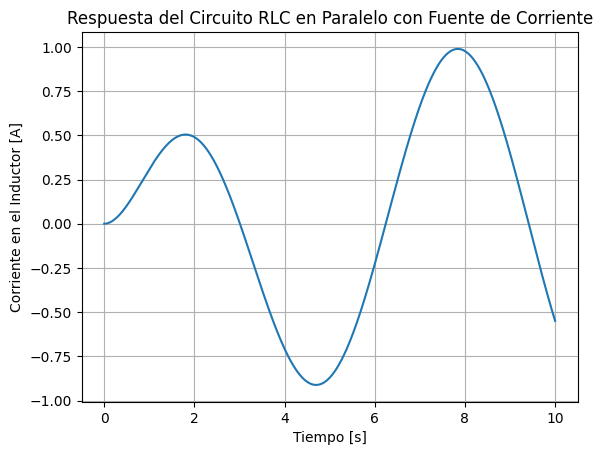

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la ecuación diferencial del circuito RLC en paralelo con fuente de corriente
def circuit_ode(V, t, R, L, C, I_in):
    dVdt = [
        V[1],  # dV/dt (tensión en el inductor)
        (1 / L) * (I_in(t) - V[0] / R - V[1] / (1 / (R * C)))  # d²V/dt² (corriente en el inductor)
    ]
    return dVdt

# Definir la corriente de entrada (puedes ajustarla según tus necesidades)
def input_current(t):
    return np.sin(t)

# Condiciones iniciales
V0 = [0.0, 0.0]

# Parámetros del circuito
R = 1.0
L = 1.0
C = 1.0

# Definir el tiempo de integración
t = np.linspace(0, 10, 1000)

# Resolver la ecuación diferencial numéricamente
solution = odeint(circuit_ode, V0, t, args=(R, L, C, input_current))

# Graficar la solución
plt.plot(t, solution[:, 1])
plt.title('Respuesta del Circuito RLC en Paralelo con Fuente de Corriente')
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente en el Inductor [A]')
plt.grid(True)
plt.show()

In [14]:


# Definir las variables simbólicas
s, R, L, C = sym.symbols('s R L C')

# Definir la función de transferencia en lazo abierto
numerator = 1
denominator = L * C * s**2 + R * C * s + 1
transfer_function_open_loop = sym.simplify(numerator / denominator)

# Mostrar la función de transferencia en lazo abierto
print("Función de transferencia en lazo abierto:")
sym.pretty_print(transfer_function_open_loop)

# Calcular y mostrar la magnitud y fase de la función de transferencia en lazo abierto
magnitude_open_loop = sym.simplify(sym.Abs(transfer_function_open_loop))
phase_open_loop = sym.arg(transfer_function_open_loop)

print("\nMagnitud de la función de transferencia en lazo abierto:")
sym.pretty_print(magnitude_open_loop)

print("\nFase de la función de transferencia en lazo abierto:")
sym.pretty_print(phase_open_loop)

Función de transferencia en lazo abierto:
        1         
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

Magnitud de la función de transferencia en lazo abierto:
         1          
────────────────────
│     2            │
│C⋅L⋅s  + C⋅R⋅s + 1│

Fase de la función de transferencia en lazo abierto:
   ⎛        1         ⎞
arg⎜──────────────────⎟
   ⎜     2            ⎟
   ⎝C⋅L⋅s  + C⋅R⋅s + 1⎠


In [12]:
# Definir las variables simbólicas
t, R, L, C, Iin, w = sym.symbols('t R L C Iin w')
s = sym.I * w  # Variable de Laplace

# Definir la corriente a través del inductor en función de la corriente de entrada
I_L = Iin / (1/R + 1/(sym.I * w * L) + sym.I * w * C)

# Tomar la transformada de Laplace de la corriente
I_L_Laplace = sp.laplace_transform(I_L, t, s, noconds=True)

# Definir la función de transferencia en lazo abierto
transfer_function_open_loop = I_L_Laplace / Iin

# Mostrar la función de transferencia en lazo abierto
print("Función de transferencia en lazo abierto:")
sym.pretty_print(transfer_function_open_loop)

Función de transferencia en lazo abierto:
-I/(w*(I*C*w + 1/R - I/(L*w)))
        -ⅈ         
───────────────────
  ⎛        1    ⅈ ⎞
w⋅⎜ⅈ⋅C⋅w + ─ - ───⎟
  ⎝        R   L⋅w⎠


### Ecuación diferencial

La ecuación diferencia del sistema mecánico se obtiene al considerar el equilibrio de fuerzas ejercidas sobre la masa:

\begin{equation}
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
\end{equation}

Donde $F_\text{E}(t) $ denota una fuerza externa que actúa sobre la masa. La fuerza $F_\text{S}(t)$ inducida por el resorte está dada por la [ley de Hooke](https://en.wikipedia.org/wiki/Hooke%27s_law)

\begin{equation}
F_\text{S}(t) = k y(t)
\end{equation}

Es común modelar la fuerza de fricción $F_\text{F}(t)$ inducida por el amortiguador de manera proporcional a la velocidad de la masa

\begin{equation}
F_\text{F}(t) = c \frac{d y(t)}{dt}
\end{equation}

La fuerza inercial $F_\text{I}(t)$ debida a la aceleración de la masa se da como

\begin{equation}
F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}
\end{equation}

Al introducir las fuerzas anteriormente halladas en el equilibrio de fuerzas se obtiene la ecuación diferencial que describe el desplazamiento del péndulo elástico amortiguado

\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t)
\end{equation}

Como consecuencia de la fuerza externa.

La ecuación anterior constituye una EDO con coeficientes constantes. Puede interpretarse como un SLTI con la fuerza externa $x(t)=F_\text{E}(t)$ como señal de entrada y el desplazamiento de la masa como la señal de salida $y(t)$.

Lo anterior en la parte de
\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t)
\end{equation}
si aplicamos la transformada de Laplace a la ecuación anterior, nos da como resultado que
\begin{equation}
{m s^2Y(s) + c sY(s) + kY(s)=X(s)}
\end{equation}
ahora sabiendo que para sacar H(s) tenemos que
 \begin{equation}
H(s)=\frac{Y(s)}{X(s)}
\end{equation}
por lo tanto nuestra ecuación quedaría
 \begin{equation}
H(s)=\frac{1}{ms^2 + c s + k}
\end{equation}


podemos compararla con el resultado de la función de transferencie encontrada para un circuito RLC en serie, el cual es \begin{equation}
Y(s) = \frac{1}{LC s^2 + RC s + 1}
\end{equation}
aquí podemos notar como LC se puede tomar como m, RC se puede tomar como c y como k puede tomar el valor de 1